**Laboratorio de Métodos Cuantitativos Aplicados a la Gestión**

---

# **Clase 15 - Integrales definidas en el análisis económico**


In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Repaso conceptual y definición operativa

Sea $f(x)$ una función.

Sean $a$ y $b$ dos puntos cualesquiera del dominio.

La *integral definida* de una función $f(x)$ entre los límites $a$ y $b$ se interpreta como el *acumulado neto* de los valores que toma $f(x)$ en ese intervalo.

Geométricamente, representa el *área bajo la curva* de $f(x)$ entre $a$ y $b$.

Se escribe: $$\int_a^b f(x)\,dx = F(b) - F(a) $$


donde $F(x)$ es una **antiderivada** de $f(x)$; es decir, una función cuya derivada vuelve a ser $f(x)$.

Esta expresión se conoce como la *Regla de Barrow*, y constituye el *Primer Teorema Fundamental del Cálculo*, que vincula el proceso de derivar con el de integrar.

### Resolución en `SymPy` y ejemplos

Al igual que con las integrales indefinidas, vamos a utilizar `SymPy` y `sp.integrate`, aunque un poco complejizado.

La documentación de `sp.integrate` nos dice que:
- `sp.integrate(f, x)` devuelve la integral indefinida de `f` con respecto a `x`
- `sp.integrate(f, (x, a, b))` devuelve la integral definida `f` con respecto a `x` entre `a` y `b`


Solo agregamos los términos entre paréntesis.

Veamos algunos ejemplos simples en una variable, $x$.

In [ ]:
x = sp.symbols('x')

Consideremos la siguiente función polinómica: $$f(x) = x^{2}$$

In [ ]:
f1 = x**2

Supongamos que queremos averiguar la integral definida entre $a = 0$ y $b = 3$. $$\int_a^b f(x) dx = \int_0^3 x^{2} dx = F(3) - F(0) $$

In [ ]:
a = 0
b = 3

Indefinidamente, integrar esta función arroja: $$\int f(x) \ dx = \int x^{2} \ dx = \frac{x^{3}}{3}$$

donde se asume que $C = 0$ es la constante de integración.

Definidamente, integrar esta función arroja: \begin{equation*}
\begin{split}
\int_0^3 x^{2} dx & = \left.\frac{x^{3}}{3}\right \rvert_{x = 3} - \left.\frac{x^{3}}{3}\right \rvert_{x = 0} \\
& = \frac{3^{3}}{3} - \frac{0^{3}}{3} \\
& = \frac{27}{3} - \frac{0}{3} \\
\int_0^3 x^{2} dx & = 9
\end{split}
\end{equation*}

In [ ]:
F1_ab = sp.integrate(f1, (x, a, b))

In [ ]:
F1_ab

Veamos gráficamente.

Primero, creamos la curva "total".

In [ ]:
x_full = np.linspace(-5, 5, 1000)

In [ ]:
f1_f = sp.lambdify(x, f1)(x_full)

Luego, creamos la curva restringida al intervalo $[a, b]$.

In [ ]:
x_fill = np.linspace(a, b, 300)
f1_fill = sp.lambdify(x, f1)(x_fill)

Graficamos.

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(x_full, f1_f, label=r'$f(x)=x^2$', linewidth=2)
plt.fill_between(x_fill,
                 f1_fill,
                 color='lightblue',
                 alpha=0.6,
                 label='int[a,b]')
plt.axvline(a, color='gray', linestyle='--', linewidth=1)
plt.axvline(b, color='gray', linestyle='--', linewidth=1)
plt.title('Área bajo $f(x)=x^2$ entre a y b')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

### Interpretación geométrica

¿Qué estamos haciendo para obtener $\int_0^3 x^{2} dx = 9$?

Estamos aproximando la **suma de valores acumulados**.

En esencia, estamos "sumando rectángulos" de base infinitesimal.

Concentrémonos en el área sombreada.

Pongamos un número arbitrario de rectángulos, $n$.

In [ ]:
n = 5

Ahora, definamos dinámicamente los rectángulos: sus bordes (`edges`), los valores de $x$ para los que tomaremos su imagen (`x_samples` y la base de los rectángulos (`dx`).

In [ ]:
x_edges = np.linspace(a, b, n+1)
x_samples = (x_edges[:-1] + x_edges[1:]) / 2
dx = (b - a) / n

Cada rectángulo tiene una altura, definidas por nuestra función `f1` original:

In [ ]:
heights = x_samples**2

Grafiquemos estos rectángulos.

In [ ]:
x_full = np.linspace(a*0.9, b*1.1, 1000)
f1_f = sp.lambdify(x, f1)(x_full)

x_fill = np.linspace(a, b, 300)
f1_fill = sp.lambdify(x, f1)(x_fill)

plt.figure(figsize=(8,5))
plt.plot(x_full, f1_f, label=r'$f(x)=x^2$', linewidth=2)

plt.axvline(a, color='gray', linestyle='--', linewidth=1)
plt.axvline(b, color='gray', linestyle='--', linewidth=1)

rect_x = x_edges[:-1]
plt.bar(rect_x,
        heights,
        width=dx,
        align='edge', alpha=0.4, edgecolor='k', linewidth=1)

plt.title('Integral de Riemann')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

La suma de la base de todos los rectángulos es denominada *integral de Riemann*, y es...

In [ ]:
np.sum(heights * dx)

...muy cerca de:

In [ ]:
F1_ab

## Aplicaciones económicas: cálculo de acumulados

### Excedente del Consumidor y del Productor

Como vimos en la primera parte de la materia, los excedentes son medidas del *bienestar económico* que generan las transacciones en un mercado competitivo.

- el **Excedente del Consumidor (EC)** representa el beneficio que obtienen los consumidores por pagar un precio menor al que estaban dispuestos a pagar
- el **Excedente del Productor (EP)** representa el beneficio que obtienen los productores por vender a un precio mayor al mínimo que aceptarían (su costo marginal)

Supongamos un modelo con las siguientes funciones:
- demanda: $Q_d(p)=120-3 \cdot p$
- oferta: $Q_s(p)=-20+2 \cdot p$

In [ ]:
p = sp.symbols('p')

In [ ]:
Q_d = 120 - 3 * p

In [ ]:
Q_s = -20 + 2 * p

Antes, calculábamos el EC y el EP de manera *gráfica* (como un triángulo). Ahora, lo vamos a hacer con integrales:
- $EC: \quad \int\limits_{p^{*}}^{p_{\max}} Q_d(p) dp$
- $EP: \quad \int\limits_{p_{\min}}^{p^{*}} Q_s(p) dp$


Nótese que nuestra variable de integración es $p$.

Por simpleza, cambiemos nuestra variable de integración.

Esto tiene la ventaja de mantener la lógica de "acumular cantidades" y conectar directamente con funciones inversas.

En lugar de lo anterior, medimos los excedentes a partir de las *funciones inversas* de demanda y oferta, es decir, expresadas como $p = P_d(q)$ y $p = P_s(q)$.

- $P_d(q)$: representa el **precio máximo** que los consumidores están dispuestos a pagar por cada unidad $q$
- $P_s(q)$: representa el **precio mínimo** al que los productores están dispuestos a ofrecer cada unidad $q$

In [ ]:
q = sp.symbols('q')

In [ ]:
P_d = (120 - q) / 3

In [ ]:
P_s = (-20 - q) / (-2)

Resolvemos.

In [ ]:
q_opt = sp.solve(sp.Eq(P_d, P_s), q)[0]

In [ ]:
q_opt

Reemplazamos.

In [ ]:
p_opt = P_s.subs(q, q_opt)

In [ ]:
p_opt

Graficando este mercado...

In [ ]:
# @title
q_grid = np.linspace(0, 50, 500)
Pd_num = sp.lambdify(q, P_d)(q_grid)
Ps_num = sp.lambdify(q, P_s)(q_grid)

plt.figure()
plt.plot(q_grid, Pd_num, label='Pd(q)')
plt.plot(q_grid, Ps_num, label='Ps(q)')
plt.vlines(x=q_opt, ymin=0, ymax=p_opt, linestyles="--", color="black")
plt.hlines(y=p_opt, xmin=0, xmax=q_opt, linestyles="--", color="black")
plt.scatter([q_opt], [p_opt], c="black")
plt.title('Mercado')
plt.xlabel('q')
plt.ylabel('P')
plt.legend()
plt.show()

¿Cómo definiríamos el EP y el EC en este mercado?

El Excedente del Consumidor (EC) es el beneficio que obtienen los consumidores por pagar un precio menor al que estaban dispuestos a pagar. Pensemos en rectángulos...

In [ ]:
n = 10

In [ ]:
# @title
q_grid = np.linspace(0, 50, 500)
Pd_num = sp.lambdify(q, P_d)(q_grid)
Ps_num = sp.lambdify(q, P_s)(q_grid)

plt.figure()
plt.plot(q_grid, Pd_num, label='Pd(q)')
plt.plot(q_grid, Ps_num, label='Ps(q)')
plt.vlines(x=q_opt, ymin=0, ymax=p_opt, linestyles="--", color="black")
plt.hlines(y=p_opt, xmin=0, xmax=q_opt, linestyles="--", color="black")
plt.scatter([q_opt], [p_opt], c="black")

x_edges = np.linspace(0, q_opt, n+1)
x_samples = (x_edges[:-1] + x_edges[1:]) / 2
dx = (q_opt - 0) / n
heights = (120 - x_samples) / 3 - p_opt

rect_x = x_edges[:-1]

plt.scatter(
    x_samples,
    heights+p_opt,
    s=20)

plt.bar(rect_x,
        heights,
        width=dx,
        bottom=p_opt,
        align='edge',
        color="green",
        alpha=0.2,
        edgecolor='k',
        linewidth=1)


plt.title('Excedente del Consumidor - Riemann')
plt.xlabel('q')
plt.ylabel('P')
plt.legend()
plt.show()

Nuestra fórmula para el EC será: $$ EC = \int\limits_{0}^{q^*} [P_d(q) - P_d(q^*)] dq $$

Computémoslo.

In [ ]:
EC = sp.integrate(P_d - p_opt, (q, 0, q_opt))

In [ ]:
EC

Similarmente, el Excedente del Productor (EP) es el beneficio que obtienen los productores por vender a un precio mayor al mínimo que aceptarían. Pensemos en rectángulos de nuevo...

In [ ]:
n = 10

In [ ]:
# @title
q_grid = np.linspace(0, 50, 500)
Pd_num = sp.lambdify(q, P_d)(q_grid)
Ps_num = sp.lambdify(q, P_s)(q_grid)

plt.figure()
plt.plot(q_grid, Pd_num, label='Pd(q)')
plt.plot(q_grid, Ps_num, label='Ps(q)')
plt.vlines(x=q_opt, ymin=0, ymax=p_opt, linestyles="--", color="black")
plt.hlines(y=p_opt, xmin=0, xmax=q_opt, linestyles="--", color="black")
plt.scatter([q_opt], [p_opt], c="black")

x_edges = np.linspace(0, q_opt, n+1)
x_samples = (x_edges[:-1] + x_edges[1:]) / 2
dx = (q_opt - 0) / n
heights = (-20 - x_samples) / (-2) - p_opt

rect_x = x_edges[:-1]

plt.scatter(
    x_samples,
    heights+p_opt,
    color="tab:orange",
    s=20)

plt.bar(rect_x,
        heights,
        width=dx,
        bottom=p_opt,
        align='edge',
        color="pink",
        alpha=0.2,
        edgecolor='k',
        linewidth=1)


plt.title('Excedente del Productor - Riemann')
plt.xlabel('q')
plt.ylabel('P')
plt.legend()
plt.show()

Nuestra fórmula para el EC será: $$ EP = \int\limits_{0}^{q^*} [P_s(q^*) - P_s(q)] dq $$

Computémoslo.

In [ ]:
EP = sp.integrate(p_opt - P_s, (q, 0, q_opt))

In [ ]:
EP

Gráficamente, ambos se ven de la siguiente manera...

In [ ]:
# @title
q_grid = np.linspace(0, 50, 500)
Pd_num = sp.lambdify(q, P_d)(q_grid)
Ps_num = sp.lambdify(q, P_s)(q_grid)

plt.figure()
plt.plot(q_grid, Pd_num, label='Pd(q)')
plt.plot(q_grid, Ps_num, label='Ps(q)')
plt.vlines(x=q_opt, ymin=0, ymax=p_opt, linestyles="--", color="black")
plt.hlines(y=p_opt, xmin=0, xmax=q_opt, linestyles="--", color="black")
plt.scatter([q_opt], [p_opt], c="black")

plt.fill_between(
    q_grid,
    Pd_num,
    float(p_opt),
    where=(q_grid <= float(q_opt)),
    alpha=0.2,
    label='Excedente del Consumidor (EC)'
)

plt.fill_between(
    q_grid,
    float(p_opt),
    Ps_num,
    where=(q_grid <= float(q_opt)),
    alpha=0.2,
    label='Excedente del Productor (EP)'
)

plt.title('Excedente del Consumidor y del Productor')
plt.xlabel('q')
plt.ylabel('P')
plt.legend()
plt.show()

#### Impuestos

Analicemos brevemente (y de manera gráfica) cómo los impuestos cambian los valores de EC y EP previamente obtenidos.

Comencemos suponiendo un impuesto de suma fija, $t$, aplicado a los productores.

De esta manera, la oferta se traslada a $Q_s(p)= -20 + 2 \cdot (p - t)$ y, por tanto, la función inversa de oferta es: $$ P_s(q) = \frac{-20 - 2 \cdot t - q}{-2} = 10 + t + \frac{1}{2} \cdot q$$

In [ ]:
t = sp.symbols('t')

In [ ]:
Q_s = -20 + 2 * (p - t)

In [ ]:
P_s_t = (-20 - q - 2 * t) / (-2)

In [ ]:
P_s_t

Asumamos que $t = 5$.

In [ ]:
P_s_t = P_s_t.subs(t, 5)

In [ ]:
P_s_t

Calculamos nuevamente los valores relevantes...

In [ ]:
q_opt_t = sp.solve(sp.Eq(P_d, P_s_t), q)[0]

In [ ]:
q_opt_t

In [ ]:
p_opt_t = P_s_t.subs(q, q_opt_t)

In [ ]:
p_opt_t

In [ ]:
EC_t = sp.integrate(P_d - p_opt_t, (q, 0, q_opt_t))

In [ ]:
EC_t.evalf()

In [ ]:
EC, EC_t.evalf()

In [ ]:
EP_t = sp.integrate(p_opt_t - P_s_t, (q, 0, q_opt_t))

In [ ]:
EP, EP_t.evalf()

Vemos que, tras el impuesto de suma fija, tanto el Excedente del Consumidor (EC) como el Excedente del Productor (EP) disminuyen.

Gráficamente.

Para el EC:

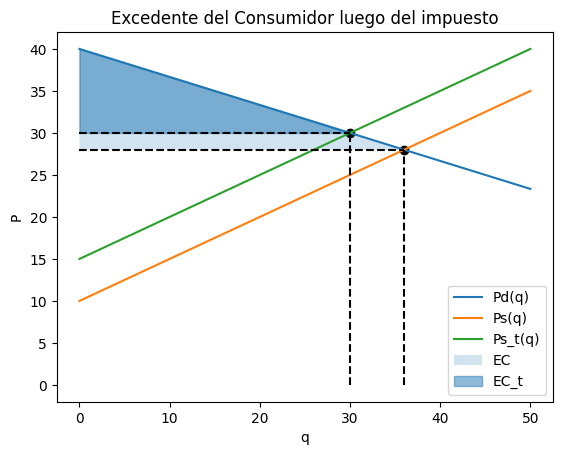

In [ ]:
# @title
q_grid = np.linspace(0, 50, 500)
Pd_num = sp.lambdify(q, P_d)(q_grid)
Ps_num = sp.lambdify(q, P_s)(q_grid)
Ps_t_num = sp.lambdify(q, P_s_t)(q_grid)

plt.figure()
plt.plot(q_grid, Pd_num, label='Pd(q)')
plt.plot(q_grid, Ps_num, label='Ps(q)')
plt.plot(q_grid, Ps_t_num, label='Ps_t(q)')

plt.vlines(x=q_opt, ymin=0, ymax=p_opt, linestyles="--", color="black")
plt.hlines(y=p_opt, xmin=0, xmax=q_opt, linestyles="--", color="black")
plt.scatter([q_opt], [p_opt], c="black")

plt.vlines(x=q_opt_t, ymin=0, ymax=p_opt_t, linestyles="--", color="black")
plt.hlines(y=p_opt_t, xmin=0, xmax=q_opt_t, linestyles="--", color="black")
plt.scatter([q_opt_t], [p_opt_t], c="black")

plt.fill_between(
    q_grid,
    Pd_num,
    float(p_opt),
    where=(q_grid <= float(q_opt)),
    alpha=0.2,
    label='EC'
)

plt.fill_between(
    q_grid,
    Pd_num,
    float(p_opt_t),
    where=(q_grid <= float(q_opt_t)),
    alpha=0.5,
    label='EC_t',
    color="tab:blue"
)

# plt.fill_between(
#     q_grid,
#     float(p_opt),
#     Ps_num,
#     where=(q_grid <= float(q_opt)),
#     alpha=0.1,
#     label='EP'
# )

# plt.fill_between(
#     q_grid,
#     float(p_opt_t),
#     Ps_t_num,
#     where=(q_grid <= float(q_opt_t)),
#     alpha=0.5,
#     label='EP_t'
# )

plt.title('Excedente del Consumidor luego del impuesto')
plt.xlabel('q')
plt.ylabel('P')
plt.legend()
plt.show()

Para el Excedente del Productor:

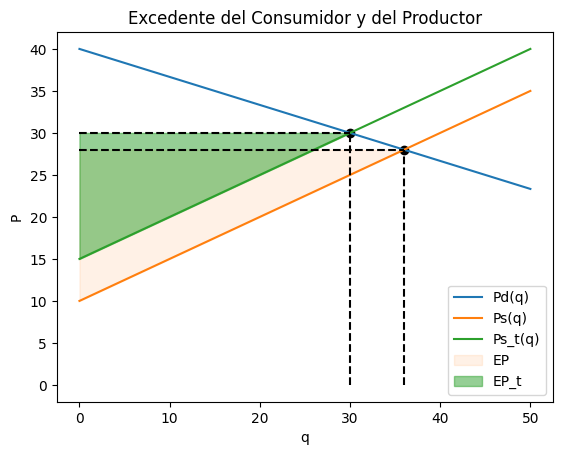

In [ ]:
# @title
q_grid = np.linspace(0, 50, 500)
Pd_num = sp.lambdify(q, P_d)(q_grid)
Ps_num = sp.lambdify(q, P_s)(q_grid)
Ps_t_num = sp.lambdify(q, P_s_t)(q_grid)

plt.figure()
plt.plot(q_grid, Pd_num, label='Pd(q)')
plt.plot(q_grid, Ps_num, label='Ps(q)')
plt.plot(q_grid, Ps_t_num, label='Ps_t(q)')

plt.vlines(x=q_opt, ymin=0, ymax=p_opt, linestyles="--", color="black")
plt.hlines(y=p_opt, xmin=0, xmax=q_opt, linestyles="--", color="black")
plt.scatter([q_opt], [p_opt], c="black")

plt.vlines(x=q_opt_t, ymin=0, ymax=p_opt_t, linestyles="--", color="black")
plt.hlines(y=p_opt_t, xmin=0, xmax=q_opt_t, linestyles="--", color="black")
plt.scatter([q_opt_t], [p_opt_t], c="black")

plt.fill_between(
    q_grid,
    float(p_opt),
    Ps_num,
    where=(q_grid <= float(q_opt)),
    alpha=0.1,
    label='EP',
    color="tab:orange"
)

plt.fill_between(
    q_grid,
    float(p_opt_t),
    Ps_t_num,
    where=(q_grid <= float(q_opt_t)),
    alpha=0.5,
    label='EP_t',
    color="tab:green"
)

plt.title('Excedente del Consumidor y del Productor')
plt.xlabel('q')
plt.ylabel('P')
plt.legend()
plt.show()

En el nuevo equilibrio, entonces:

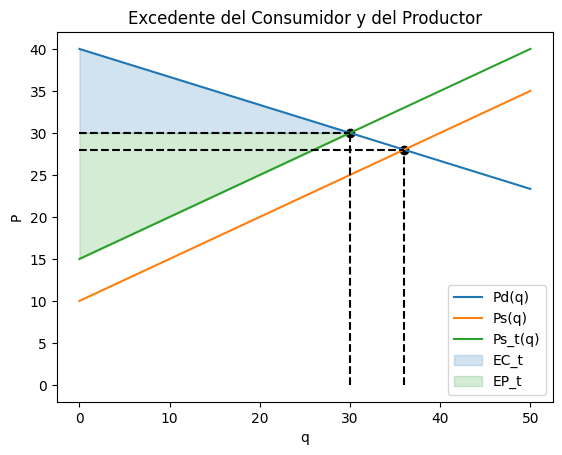

In [ ]:
# @title
q_grid = np.linspace(0, 50, 500)
Pd_num = sp.lambdify(q, P_d)(q_grid)
Ps_num = sp.lambdify(q, P_s)(q_grid)
Ps_t_num = sp.lambdify(q, P_s_t)(q_grid)

plt.figure()
plt.plot(q_grid, Pd_num, label='Pd(q)')
plt.plot(q_grid, Ps_num, label='Ps(q)')
plt.plot(q_grid, Ps_t_num, label='Ps_t(q)')

plt.vlines(x=q_opt, ymin=0, ymax=p_opt, linestyles="--", color="black")
plt.hlines(y=p_opt, xmin=0, xmax=q_opt, linestyles="--", color="black")
plt.scatter([q_opt], [p_opt], c="black")

plt.vlines(x=q_opt_t, ymin=0, ymax=p_opt_t, linestyles="--", color="black")
plt.hlines(y=p_opt_t, xmin=0, xmax=q_opt_t, linestyles="--", color="black")
plt.scatter([q_opt_t], [p_opt_t], c="black")

plt.fill_between(
    q_grid,
    Pd_num,
    float(p_opt_t),
    where=(q_grid <= float(q_opt_t)),
    alpha=0.2,
    label='EC_t',
    color="tab:blue"
)

plt.fill_between(
    q_grid,
    float(p_opt_t),
    Ps_t_num,
    where=(q_grid <= float(q_opt_t)),
    alpha=0.2,
    label='EP_t',
    color="tab:green"
)

plt.title('Excedente del Consumidor y del Productor')
plt.xlabel('q')
plt.ylabel('P')
plt.legend()
plt.show()

##### Cálculo de la *pérdida de peso muerto*

Notar que hay un triángulo, marcado abajo en rosa, que antes formaba parte del EC pero, tras el impuesto, no es apropiado ni por consumidores ni por productores.

Se trata de una pérdida de bienestar: *peso muerto* o *deadweight loss* (DWL).

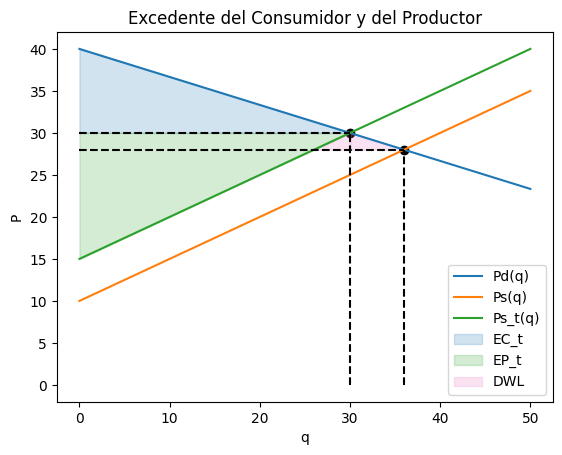

In [ ]:
# @title
q_grid = np.linspace(0, 50, 500)
Pd_num = sp.lambdify(q, P_d)(q_grid)
Ps_num = sp.lambdify(q, P_s)(q_grid)
Ps_t_num = sp.lambdify(q, P_s_t)(q_grid)

plt.figure()
plt.plot(q_grid, Pd_num, label='Pd(q)')
plt.plot(q_grid, Ps_num, label='Ps(q)')
plt.plot(q_grid, Ps_t_num, label='Ps_t(q)')

plt.vlines(x=q_opt, ymin=0, ymax=p_opt, linestyles="--", color="black")
plt.hlines(y=p_opt, xmin=0, xmax=q_opt, linestyles="--", color="black")
plt.scatter([q_opt], [p_opt], c="black")

plt.vlines(x=q_opt_t, ymin=0, ymax=p_opt_t, linestyles="--", color="black")
plt.hlines(y=p_opt_t, xmin=0, xmax=q_opt_t, linestyles="--", color="black")
plt.scatter([q_opt_t], [p_opt_t], c="black")

plt.fill_between(
    q_grid,
    Pd_num,
    float(p_opt_t),
    where=(q_grid <= float(q_opt_t)),
    alpha=0.2,
    label='EC_t',
    color="tab:blue"
)

plt.fill_between(
    q_grid,
    float(p_opt_t),
    Ps_t_num,
    where=(q_grid <= float(q_opt_t)),
    alpha=0.2,
    label='EP_t',
    color="tab:green"
)

condition_mask = (q_grid <= float(q_opt)) & (q_grid >= float(q_opt_t))

condition_mask_1 = (q_grid <= float(q_opt_t)) & (q_grid >= 26)

plt.fill_between(
    q_grid,
    float(p_opt),
    Pd_num,
    where=condition_mask,
    alpha=0.2,
    label='DWL',
    color="tab:pink"
)

plt.fill_between(
    q_grid,
    float(p_opt),
    Ps_t_num,
    where=condition_mask_1,
    alpha=0.2,
    color="tab:pink"
)

plt.title('Excedente del Consumidor y del Productor')
plt.xlabel('q')
plt.ylabel('P')
plt.legend()
plt.show()

¿Cómo podemos calcular esta *pérdida de peso muerto*? Integrando.

Notemos que la pérdida de peso muerto está compuesta por 2 sub-triángulos:
- un sub-triángulo que tiene como base la distancia entre el valor de la *nueva* función de oferta y el *nuevo* valor de $q$ óptimo
- un sub-triángulo que tiene como base la distancia entre el valor de la función de demanda y valor *original* de $q$ óptimo

Ambos comparten la altura: la diferencia entre el precio óptimo original y *nuevo*.

Naturalmente, podríamos calcular el área del triángulo:

In [ ]:
DWL_sin_integrar = 1/2 * (q_opt - Q_s.subs({t: 5, p: p_opt})) * (p_opt_t - p_opt)

In [ ]:
DWL_sin_integrar

10.0000000000000

Pero, podríamos también plantear este área como la suma de 2 integrales definidas: $$ DWL = \int\limits_{Q_{s}^{t}(p_{opt})}^{q_opt^{t}} [P_{s}^{t} (q) - P^{*}] \ dq + \int\limits_{q_opt^{t}}^{q_opt} [P_{d} (q) - P^{*}] \ dq $$

In [ ]:
DWL_int_1 = sp.integrate(
    P_s_t - p_opt,
    (q, Q_s.subs({t: 5, p: p_opt}), q_opt_t)
)

In [ ]:
DWL_int_1

4

In [ ]:
DWL_int_2 = sp.integrate(
    P_d - p_opt,
    (q, q_opt_t, q_opt)
)

In [ ]:
DWL_int_2

6

In [ ]:
DWL_int = DWL_int_1 + DWL_int_2

In [ ]:
DWL_int

10

### Totales acumulados

Las integrales definidas también nos sirve para responder preguntas relativas a los totales acumulados de variables económicas entre determinados niveles de $q$.

#### Ingresos

Sea una demanda inversa $P(q)=\alpha-\beta \cdot q$ con $\alpha,\beta>0$.

In [ ]:
alpha, beta = 80, 1.5

In [ ]:
P_q = alpha - beta*q

El ingreso total toma la forma.

In [ ]:
I = P_q * q

In [ ]:
I

q*(80 - 1.5*q)

¿Y si quiséramos obtener una medida del ingreso total acumulado entre $q = 10$ y $q = 20$, por ejemplo? Podríamos restar $I(20)$ e $I(10)$.

In [ ]:
I_acum = I.subs(q, 20) - I.subs(q, 10)

In [ ]:
I_acum

350.000000000000

O bien, podríamos integrar el ingreso marginal entre $q = 10$ y $q = 20$.

In [ ]:
I_acum_ = sp.integrate(sp.diff(I, q), (q, 10, 20))

In [ ]:
I_acum_

350.000000000000

¿Qué significa este valor? Veámoslo gráficamente.

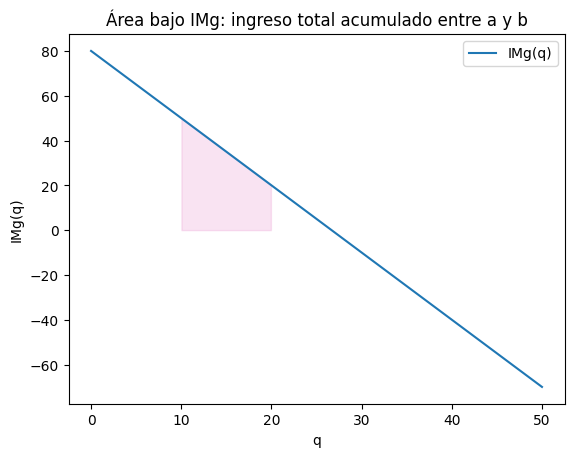

In [ ]:
IMg_num = sp.lambdify(q, sp.diff(I, q))(q_grid)

plt.figure()
plt.plot(q_grid, IMg_num, label='IMg(q)')
plt.fill_between(q_grid,
                 IMg_num,
                 0,
                 where=((q_grid >= 10) & (q_grid <= 20)),
                 color = "tab:pink",
                 alpha=0.2
                 )
plt.title('Área bajo IMg: ingreso total acumulado entre a y b')
plt.xlabel('q')
plt.ylabel('IMg(q)')
plt.legend()
plt.show()

Recordar:
> $I(\bar{q})$ ya acumula los ingresos de todas las unidades desde $q = 0$ hasta $q = \bar{q}$.


Integrar $I(q)$ sería "acumular un acumulado", por eso no tiene la misma interpretación que el área bajo la curva.

En cambio, integrar $IMg(q)$ de manera definida entre $a$ y $b$ brinda información sobre el ingreso adicional al pasar de $a$ a $b$.

#### Costos

Partamos de una función de costo marginal cualquiera: $$ CMg(q) = q^\frac{2}{3} + 2 \cdot q $$

In [ ]:
q = sp.symbols("q")

In [ ]:
CMg = q**2/3 + 2 * q

Obtenemos el costo total integrando indefinidamente.

In [ ]:
F = sp.symbols("F")

In [ ]:
C = sp.integrate(CMg, q) + F

In [ ]:
C

F + q**3/9 + q**2

Asumimos $C(0) = 25$.

In [ ]:
F_val = sp.solve(sp.Eq(C.subs(q, 0), 25), F)[0]

Obtenemos la función de costos.

In [ ]:
C = C.subs(F, F_val)

In [ ]:
C

q**3/9 + q**2 + 25

Graficamos.

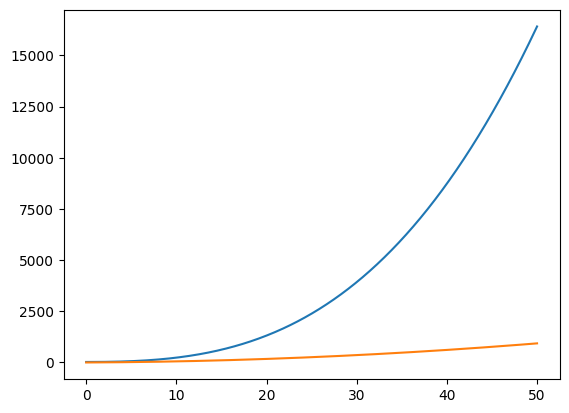

In [ ]:
C_num = sp.lambdify(q, C)(q_grid)
CMg_num = sp.lambdify(q, CMg)(q_grid)
plt.plot(q_grid, C_num, label="C")
plt.plot(q_grid, CMg_num, label="CMg")

Ahora, queremos averiguar el *costo variable total* **acumulado** entre dos valores cualesquiera de $q$; por ejemplo, $q = 20$ y $q = 10$.

Podríamos proceder directamente, restando $C(20)$ y $C(10)$, lo que equivale a restar primitivas.

In [ ]:
C.subs(q, 20) - C.subs(q, 10)

9700/9

O también, podríamos integrar el valor del costo marginal entre $q = 10$ y $q = 20$.

In [ ]:
sp.integrate(CMg, (q, 10, 20))

9700/9

Gráficamente, estamos preteniendo obtener...

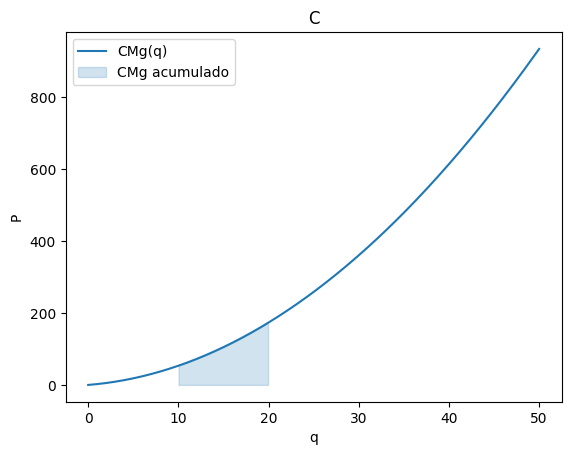

In [ ]:
# @title
q_grid = np.linspace(0, 50, 500)
CMg_num = sp.lambdify(q, CMg)(q_grid)

plt.figure()
plt.plot(q_grid, CMg_num, label='CMg(q)')

plt.fill_between(
    q_grid,
    CMg_num,
    where=((q_grid >= 10) & (q_grid <= 20)),
    alpha=0.2,
    label='CMg acumulado',
    color="tab:blue"
)

plt.title('C')
plt.xlabel('q')
plt.ylabel('P')
plt.legend()
plt.show()